In [2]:
import pandas as pd
import os
import re
import nltk as nltk
import numpy as np

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import seaborn as sns


In [3]:
#folder path
path= "C:\Dipin_Teradata\Capstone_Project\Project FM\Text\Text"
os.chdir(path)

In [4]:
#reading files
filelist = os.listdir()
files = [f for f in filelist]

In [5]:
#####Individual speeches
PM201002 = open(files[0], "r",encoding="ISO-8859-1")
PM201002=PM201002.read()

PM201102 = open(files[1], "r",encoding="ISO-8859-1")
PM201102=PM201102.read()

PM201203 = open(files[2], "r",encoding="ISO-8859-1")
PM201203=PM201203.read()

PC201302 = open(files[3], "r",encoding="ISO-8859-1")
PC201302=PC201302.read()

PC201402 = open(files[4], "r",encoding="ISO-8859-1")
PC201402=PC201402.read()

AJ201407 = open(files[5], "r",encoding="ISO-8859-1")
AJ201407=AJ201407.read()

AJ201502 = open(files[6], "r",encoding="ISO-8859-1")
AJ201502=AJ201502.read()

AJ201602 = open(files[7], "r",encoding="ISO-8859-1")
AJ201602=AJ201602.read()

AJ201702 = open(files[8], "r",encoding="ISO-8859-1")
AJ201702=AJ201702.read()

AJ201802 = open(files[9], "r",encoding="ISO-8859-1")
AJ201802=AJ201802.read()

PG201902 = open(files[10], "r",encoding="ISO-8859-1")
PG201902=PG201902.read()

NS201907 = open(files[11], "r",encoding="ISO-8859-1")
NS201907=NS201907.read()


In [6]:
#Premilinary Cleaning
PM201002=PM201002.replace('\n\n','\n')
PM201102=PM201102.replace('\n\n','\n')
PM201203=PM201203.replace('\n\n','\n')
PC201302=PC201302.replace('\n\n','\n')
PC201402=PC201402.replace('\n\n','\n')
AJ201407=AJ201407.replace('\n\n','\n')
AJ201502=AJ201502.replace('\n\n','\n')
AJ201602=AJ201602.replace('\n\n','\n')
AJ201702=AJ201702.replace('\n\n','\n')
AJ201802=AJ201802.replace('\n\n','\n')
PG201902=PG201902.replace('\n\n','\n')
NS201907=NS201907.replace('\n\n','\n')


PM201002=PM201002.replace('\n','')
PM201102=PM201102.replace('\n','')
PM201203=PM201203.replace('\n','')
PC201302=PC201302.replace('\n','')
PC201402=PC201402.replace('\n','')
AJ201407=AJ201407.replace('\n','')
AJ201502=AJ201502.replace('\n','')
AJ201602=AJ201602.replace('\n','')
AJ201702=AJ201702.replace('\n','')
AJ201802=AJ201802.replace('\n','')
PG201902=PG201902.replace('\n','')
NS201907=NS201907.replace('\n','')


PM201002 = PM201002.lower()
PM201102 = PM201102.lower()
PM201203 = PM201203.lower()
PC201302 = PC201302.lower()
PC201402 = PC201402.lower()
AJ201407 = AJ201407.lower()
AJ201502 = AJ201502.lower()
AJ201602 = AJ201602.lower()
AJ201702 = AJ201702.lower()
AJ201802 = AJ201802.lower()
PG201902 = PG201902.lower()
NS201907 = NS201907.lower()

In [7]:
PM201002_df=pd.DataFrame([PM201002],columns=['speech'])
PM201102_df=pd.DataFrame([PM201102],columns=['speech'])
PM201203_df=pd.DataFrame([PM201203],columns=['speech'])
PC201302_df=pd.DataFrame([PC201302],columns=['speech'])
PC201402_df=pd.DataFrame([PC201402],columns=['speech'])
AJ201407_df=pd.DataFrame([AJ201407],columns=['speech'])
AJ201502_df=pd.DataFrame([AJ201502],columns=['speech'])
AJ201602_df=pd.DataFrame([AJ201602],columns=['speech'])
AJ201702_df=pd.DataFrame([AJ201702],columns=['speech'])
AJ201802_df=pd.DataFrame([AJ201802],columns=['speech'])
PG201902_df=pd.DataFrame([PG201902],columns=['speech'])
NS201907_df=pd.DataFrame([NS201907],columns=['speech'])

In [8]:
PM201002_df.rename(columns={0: 'Text'}, inplace=True)
PM201102_df.rename(columns={0: 'Text'}, inplace=True)
PM201203_df.rename(columns={0: 'Text'}, inplace=True)
PC201302_df.rename(columns={0: 'Text'}, inplace=True)
PC201402_df.rename(columns={0: 'Text'}, inplace=True)
AJ201407_df.rename(columns={0: 'Text'}, inplace=True)
AJ201502_df.rename(columns={0: 'Text'}, inplace=True)
AJ201602_df.rename(columns={0: 'Text'}, inplace=True)
AJ201702_df.rename(columns={0: 'Text'}, inplace=True)
AJ201802_df.rename(columns={0: 'Text'}, inplace=True)
PG201902_df.rename(columns={0: 'Text'}, inplace=True)
NS201907_df.rename(columns={0: 'Text'}, inplace=True)

In [9]:
PM201002_df['FM']='Pranab Mukherjee'
PM201102_df['FM']='Pranab Mukherjee'
PM201203_df['FM']='Pranab Mukherjee'
PC201302_df['FM']='P Chidambaram'
PC201402_df['FM']='P Chidambaram'
AJ201407_df['FM']='Arun Jaitley'
AJ201502_df['FM']='Arun Jaitley'
AJ201602_df['FM']='Arun Jaitley'
AJ201702_df['FM']='Arun Jaitley'
AJ201802_df['FM']='Arun Jaitley'
PG201902_df['FM']='Piyush Goyal'
NS201907_df['FM']='Nirmala Sitharaman'

In [10]:
PM201002_df['Year']='2010'
PM201102_df['Year']='2011'
PM201203_df['Year']='2012'
PC201302_df['Year']='2013'
PC201402_df['Year']='2014-INT'
AJ201407_df['Year']='2014'
AJ201502_df['Year']='2015'
AJ201602_df['Year']='2016'
AJ201702_df['Year']='2017'
AJ201802_df['Year']='2018'
PG201902_df['Year']='2019-INT'
NS201907_df['Year']='2019'

In [11]:
########One DF for all speeches combined 
FINAL_DF= pd.concat([PM201002_df,PM201102_df,PM201203_df,PC201302_df,PC201402_df,AJ201407_df,AJ201502_df,AJ201602_df,AJ201702_df,AJ201802_df,PG201902_df,NS201907_df])

In [12]:
SPLIT_FINAL_DF=FINAL_DF.assign(speech=FINAL_DF.speech.str.split(".")).explode('speech')

In [15]:
#######create a function for cleaning the text
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
Stop_Nltk_EX=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'ma', "wouldn't"]

stop_updated = Stop_Nltk_EX + ["ofpranab","2011","mukherjeeminister","crore","nil","etc","like","government","httpindiabudgetnicin","bcd","25","propose","india","lakh","scheme","budget","per", "cent","govern","tax","year","proposed","act","reduce","good","make","percent","set","new","use","include","provide","also","provided","madam speaker","prime minister","honorable member","years","would","increase","national","country","budget","state","shall"]

def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+\d+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub(r"[^\w\s]+","",result)
    tokens = word_tokenize(result1.lower())
    Lemma = [lemmatizer.lemmatize(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    res = " ".join(Lemma)
    return res

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
Stop_Nltk_EX=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'ma', "wouldn't"]

stop_updated = Stop_Nltk_EX + ["ofpranab","2011","mukherjeeminister","crore","nil","etc","like","government","httpindiabudgetnicin","bcd","25","propose","india","lakh","scheme","budget","per", "cent","govern","tax","year","proposed","act","reduce","good","make","percent","set","new","use","include","provide","also","provided","madam speaker","prime minister","honorable member","years","would","increase","national","country","budget","state","shall"]

def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+\d+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub(r"[^\w\s]+","",result)
    tokens = word_tokenize(result1.lower())
    Lemma = [lemmatizer.lemmatize(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    res = " ".join(Lemma)
    return res

,speech,FM,Year,Speech_Cleaned
0,budget 2010-2011 speech ofpranab mukherjeemi...,Pranab Mukherjee,2010,speech finance february madam speaker rise pre...
0,"in 2009, when i presented the inte...",Pranab Mukherjee,2010,presented interim february regular july august...
0,growth had started decelerating and the busin...,Pranab Mukherjee,2010,growth started decelerating business sentiment...
0,the economy's capacity to sustain high growth...,Pranab Mukherjee,2010,economy capacity sustain high growth serious t...
0,2,Pranab Mukherjee,2010,
...,...,...,...,...
0,(l) services by national pension system (nps)...,Nirmala Sitharaman,2019,service pension system np trust member conside...
0,(m) rehabilitation/therapy/counselling servic...,Nirmala Sitharaman,2019,rehabilitationtherapycounselling service rehab...
0,"(n) admission to circus, dance, theatre etc h...",Nirmala Sitharaman,2019,admission circus dance theatre admission ticke...
0,500 per person,Nirmala Sitharaman,2019,500 person


In [ ]:
SPLIT_FINAL_DF1=SPLIT_FINAL_DF[SPLIT_FINAL_DF['Speech_Cleaned'].apply(clean_text)]
SPLIT_FINAL_DF1

In [17]:
SPLIT_FINAL_DF1=SPLIT_FINAL_DF[SPLIT_FINAL_DF['Speech_Cleaned']!=""]
SPLIT_FINAL_DF1

,speech,FM,Year,Speech_Cleaned
0,budget 2010-2011 speech ofpranab mukherjeemi...,Pranab Mukherjee,2010,speech finance february madam speaker rise pre...
0,"in 2009, when i presented the inte...",Pranab Mukherjee,2010,presented interim february regular july august...
0,growth had started decelerating and the busin...,Pranab Mukherjee,2010,growth started decelerating business sentiment...
0,the economy's capacity to sustain high growth...,Pranab Mukherjee,2010,economy capacity sustain high growth serious t...
0,"it was not clear to us, as also to t...",Pranab Mukherjee,2010,not clear policy maker many country crisis eve...
...,...,...,...,...
0,(k) services by an old age home run by centra...,Nirmala Sitharaman,2019,service old age home run central entity regist...
0,(l) services by national pension system (nps)...,Nirmala Sitharaman,2019,service pension system np trust member conside...
0,(m) rehabilitation/therapy/counselling servic...,Nirmala Sitharaman,2019,rehabilitationtherapycounselling service rehab...
0,"(n) admission to circus, dance, theatre etc h...",Nirmala Sitharaman,2019,admission circus dance theatre admission ticke...


<function matplotlib.pyplot.show(*args, **kw)>

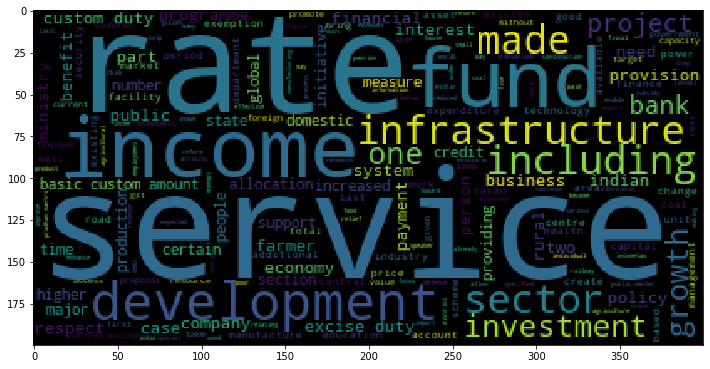

In [18]:
########## WordCloud with Stopwords
from wordcloud import WordCloud
Cleaned_Speech= WordCloud().generate(''.join(SPLIT_FINAL_DF1['Speech_Cleaned']))


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=[12,12])
plt.imshow(Cleaned_Speech)
plt.show

In [19]:
###### remove numbers 
SPLIT_FINAL_DF1['Speech_Cleaned_Num']=SPLIT_FINAL_DF1['Speech_Cleaned'].apply(lambda x : (re.sub("[0-9]"," ",x)))

C:\Users\DP186035\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
SPLIT_FINAL_DF1

,speech,FM,Year,Speech_Cleaned,Speech_Cleaned_Num
0,budget 2010-2011 speech ofpranab mukherjeemi...,Pranab Mukherjee,2010,speech finance february madam speaker rise pre...,speech finance february madam speaker rise pre...
0,"in 2009, when i presented the inte...",Pranab Mukherjee,2010,presented interim february regular july august...,presented interim february regular july august...
0,growth had started decelerating and the busin...,Pranab Mukherjee,2010,growth started decelerating business sentiment...,growth started decelerating business sentiment...
0,the economy's capacity to sustain high growth...,Pranab Mukherjee,2010,economy capacity sustain high growth serious t...,economy capacity sustain high growth serious t...
0,"it was not clear to us, as also to t...",Pranab Mukherjee,2010,not clear policy maker many country crisis eve...,not clear policy maker many country crisis eve...
...,...,...,...,...,...
0,(k) services by an old age home run by centra...,Nirmala Sitharaman,2019,service old age home run central entity regist...,service old age home run central entity regist...
0,(l) services by national pension system (nps)...,Nirmala Sitharaman,2019,service pension system np trust member conside...,service pension system np trust member conside...
0,(m) rehabilitation/therapy/counselling servic...,Nirmala Sitharaman,2019,rehabilitationtherapycounselling service rehab...,rehabilitationtherapycounselling service rehab...
0,"(n) admission to circus, dance, theatre etc h...",Nirmala Sitharaman,2019,admission circus dance theatre admission ticke...,admission circus dance theatre admission ticke...


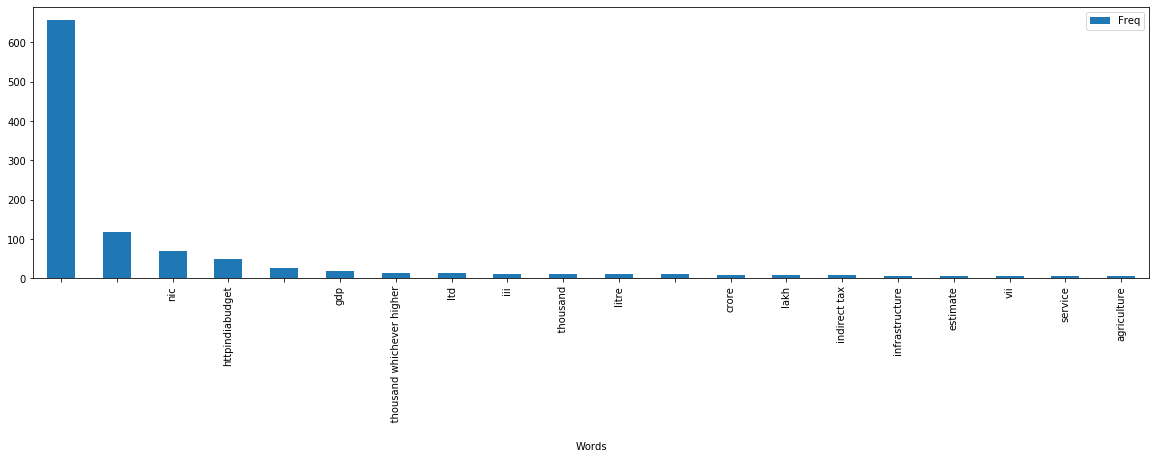

In [21]:
from nltk.probability import FreqDist
BAR_DATA= FreqDist(SPLIT_FINAL_DF1['Speech_Cleaned_Num'])
BAR_DATA_1=pd.DataFrame(BAR_DATA.items(),columns=['Words','Freq'])
BAR_DATA_1.sort_values(ascending=False, by='Freq').head(20).plot.bar(x='Words',y='Freq',figsize=(20,5))

In [22]:
from textblob import TextBlob
def find_poll(review):
    return TextBlob(review).sentiment.polarity

In [23]:
SPLIT_FINAL_DF1['sentiment_polarity']= SPLIT_FINAL_DF1['Speech_Cleaned_Num'].apply(find_poll)


C:\Users\DP186035\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


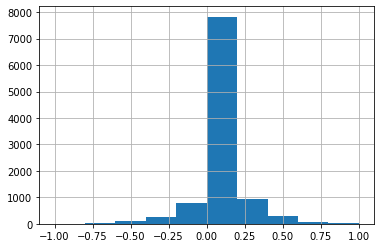

In [24]:
SPLIT_FINAL_DF1['sentiment_polarity'].hist()

In [25]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
SPLIT_FINAL_DF1['sentiment_polarity_tag']=SPLIT_FINAL_DF1['sentiment_polarity'].\
   map(lambda x: sentiment(x))



C:\Users\DP186035\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


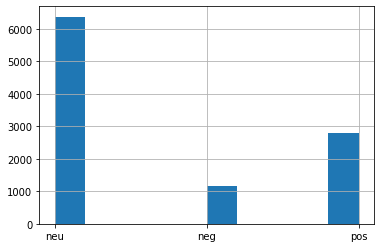

In [26]:
SPLIT_FINAL_DF1['sentiment_polarity_tag'].hist()

In [27]:
SUM_POL = SPLIT_FINAL_DF1['sentiment_polarity'].sum()  
SUM_POL

482.8952952126663

In [28]:
#Positive sentiments by Year
SPLIT_FINAL_DF1.groupby(['Year']).sum()

,sentiment_polarity
Year,
2010,46.236525
2011,44.062214
2012,34.087942
2013,44.633737
2014,37.756734
2014-INT,13.005056
2015,36.852477
2016,46.256455
2017,52.064044


In [29]:
#Positive sentiments by Year
SPLIT_FINAL_DF1.groupby(['FM']).sum()

,sentiment_polarity
FM,
Arun Jaitley,221.750108
Nirmala Sitharaman,60.003016
P Chidambaram,57.638793
Piyush Goyal,19.116698
Pranab Mukherjee,124.386681


In [30]:
filelist

['201002 PM.txt',
 '201102 PM.txt',
 '201203 PM.txt',
 '201302 PC.txt',
 '201402 PC Int.txt',
 '201407 AJ.txt',
 '201502 AJ.txt',
 '201602 AJ.txt',
 '201702 AJ.txt',
 '201802 AJ.txt',
 '201902 PG Int.txt',
 '201907 NS.txt']

In [31]:
#Create dataframe for all the speeches

filelist= os.listdir()
data = []
for f in filelist:
    with open(f,'r') as myfile:
        string = myfile.read()
        data.append(string)

In [34]:
PM201002_txt= data[0]
PM201102_txt= data[1]
PM201203_txt= data[2]
PC201302_txt= data[3]
PC201402_txt= data[4]
AJ201407_txt= data[5]
AJ201502_txt= data[6]
AJ201602_txt= data[7]
AJ201702_txt= data[8]
AJ201802_txt= data[9]
PG201902_txt= data[10]
NS201907_txt= data[11]

In [35]:
PM201002_txt =  PM201002_txt.replace('\n\n','\n')
PM201002_txt =  PM201002_txt.replace('\n','')
PM201002_txt =  PM201002_txt.strip()
PM201002_txt =  re.sub(' +', ' ',PM201002_txt)
PM201002_txt =  re.sub('\.',' ',PM201002_txt)
PM201002_txt =  PM201002_txt.lower()
PM201002_txt =  re.sub("[0-9]"," ",PM201002_txt)
PM201002_txt =  re.sub("\s+\d+\W+", "", PM201002_txt)
PM201002_txt =  re.sub( r'\([a-z]+\)' ," ",PM201002_txt)
PM201002_txt = ' '.join([w for w in PM201002_txt.split() if len(w)>3])


In [36]:
import string
for c in string.punctuation:
    PM201002_txt= PM201002_txt.replace(c,"")

In [38]:
from nltk.tokenize import word_tokenize
PM201002_txt_Tok = word_tokenize(PM201002_txt.lower())
print(PM201002_txt_Tok[:200])

['budget', 'speech', 'ofpranab', 'mukherjeeminister', 'finance', 'february', 'madam', 'speaker', 'rise', 'present', 'union', 'budget', 'when', 'presented', 'interim', 'budget', 'february', 'regular', 'budget', 'july', 'this', 'august', 'house', 'indian', 'economy', 'facing', 'grave', 'uncertainties', 'growth', 'started', 'decelerating', 'business', 'sentiment', 'weak', 'economys', 'capacity', 'sustain', 'high', 'growth', 'under', 'serious', 'threat', 'from', 'widespread', 'economic', 'slowdown', 'developed', 'world', 'clear', 'also', 'policy', 'makers', 'many', 'other', 'countries', 'this', 'crisis', 'would', 'eventually', 'unfold', 'what', 'would', 'impact', 'growth', 'momentum', 'indian', 'economy', 'soon', 'will', 'able', 'turnaround', 'fortunes', 'economy', 'short', 'term', 'global', 'outlook', 'bleak', 'consensus', 'that', 'year', 'would', 'face', 'brunt', 'this', 'crisis', 'across', 'world', 'home', 'there', 'added', 'uncertainty', 'account', 'delayed', 'subnormal', 'southwest', 

In [39]:
from nltk.probability import FreqDist
PM201002_txt_Tok_dist = FreqDist(PM201002_txt_Tok)
PM201002_txt_Tok_dist

FreqDist({'this': 102, 'cent': 99, 'propose': 92, 'crore': 87, 'from': 79, 'that': 73, 'year': 70, 'with': 67, 'will': 63, 'duty': 63, ...})

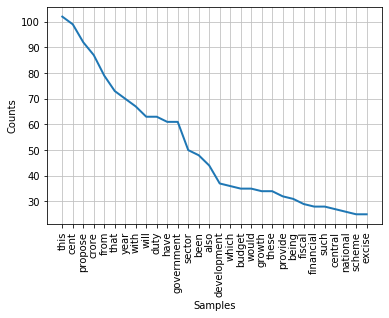

In [40]:
PM201002_txt_Tok_dist.plot(30)
plt.show()

In [41]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + ["crore","ofpranab","mukherjeeminister","speech","madam","speaker","nil","etc","like","government","httpindiabudgetnicin","bcd","25","propose","india","lakh","scheme","budget","per", "cent","govern","tax","year","proposed","act","reduce","good","make","percent","set","new","use","include","provide","also","provided","madam speaker","prime minister","honorable member","years","would","increase","national","country","budget","state","shall"]

PM201002_txt_Tok_Stop = [term for term in PM201002_txt_Tok if term not in stop_updated and len(term)>3]
print(PM201002_txt_Tok_Stop)

['finance', 'february', 'rise', 'present', 'union', 'presented', 'interim', 'february', 'regular', 'july', 'august', 'house', 'indian', 'economy', 'facing', 'grave', 'uncertainties', 'growth', 'started', 'decelerating', 'business', 'sentiment', 'weak', 'economys', 'capacity', 'sustain', 'high', 'growth', 'serious', 'threat', 'widespread', 'economic', 'slowdown', 'developed', 'world', 'clear', 'policy', 'makers', 'many', 'countries', 'crisis', 'eventually', 'unfold', 'impact', 'growth', 'momentum', 'indian', 'economy', 'soon', 'able', 'turnaround', 'fortunes', 'economy', 'short', 'term', 'global', 'outlook', 'bleak', 'consensus', 'face', 'brunt', 'crisis', 'across', 'world', 'home', 'added', 'uncertainty', 'account', 'delayed', 'subnormal', 'southwest', 'monsoon', 'undermined', 'kharif', 'crop', 'concerns', 'production', 'prices', 'food', 'items', 'possible', 'repercussions', 'growth', 'rural', 'demand', 'today', 'stand', 'confidence', 'weathered', 'crises', 'well', 'indian', 'economy',

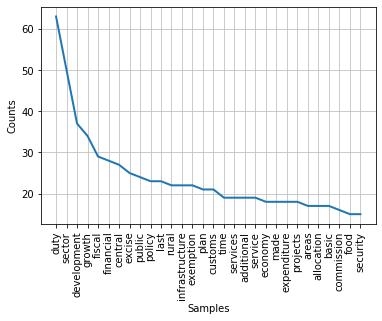

In [42]:
from nltk.probability import FreqDist
PM201002_txt_Tok_Stop_plt = FreqDist(PM201002_txt_Tok_Stop)
PM201002_txt_Tok_Stop_plt

PM201002_txt_Tok_Stop_plt.plot(30)
plt.show()

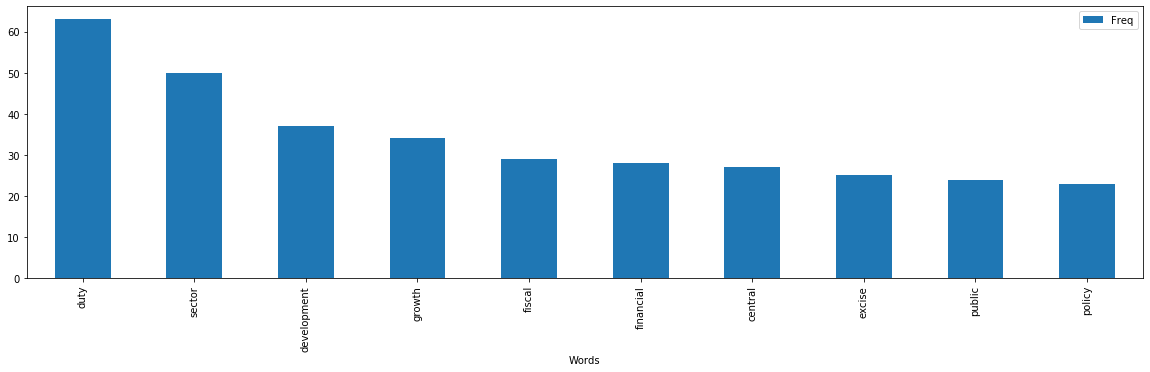

In [43]:
from nltk.probability import FreqDist
BAR_DATA= FreqDist(PM201002_txt_Tok_Stop_plt)
BAR_DATA_1=pd.DataFrame(BAR_DATA.items(),columns=['Words','Freq'])
BAR_DATA_1.sort_values(ascending=False, by='Freq').head(10).plot.bar(x='Words',y='Freq',figsize=(20,5))

In [44]:
PM201002_txt_Tok_Stop_str = ' '.join(map(str, PM201002_txt_Tok_Stop)) 
PM201002_txt_Tok_Stop_str

'finance february rise present union presented interim february regular july august house indian economy facing grave uncertainties growth started decelerating business sentiment weak economys capacity sustain high growth serious threat widespread economic slowdown developed world clear policy makers many countries crisis eventually unfold impact growth momentum indian economy soon able turnaround fortunes economy short term global outlook bleak consensus face brunt crisis across world home added uncertainty account delayed subnormal southwest monsoon undermined kharif crop concerns production prices food items possible repercussions growth rural demand today stand confidence weathered crises well indian economy better position challenges today less nine months leadership sonia gandhi elected back power prime minister manmohan singh formed second term three challenges medium term perspective outlined last remain relevant even today continue engage indian policyplanners next first chall

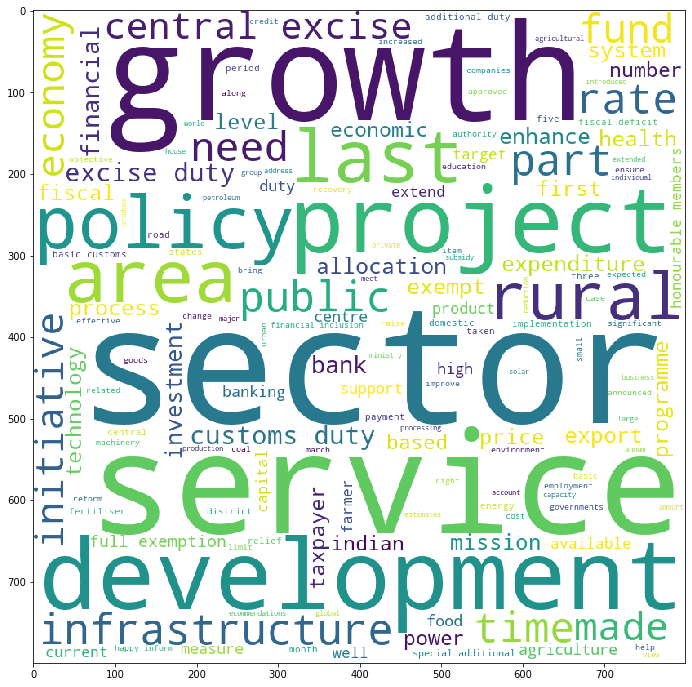

In [45]:
word_cloud = WordCloud().generate(PM201002_txt_Tok_Stop_str)
word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(PM201002_txt_Tok_Stop_str)

plt.figure(figsize=[12,12])
plt.imshow(word_cloud)
plt.show()

In [46]:
PM201002_txt_Tok_Stop_str_DF=pd.DataFrame([PM201002_txt_Tok_Stop_str])
PM201002_txt_Tok_Stop_str_DF.columns= ['Speech']
PM201002_txt_Tok_Stop_str_DF

,Speech
0,finance february rise present union presented ...


In [47]:
######## CREATE BIGRAMS

from sklearn.feature_extraction.text import CountVectorizer
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=150)


X_bigram = bigram_count_vectorizer.fit_transform(PM201002_txt_Tok_Stop_str_DF['Speech'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [48]:
print(bigram_count_vectorizer.get_feature_names()[:20])

['additional duty', 'agriculture related', 'available specified', 'awas yojana', 'banking financial', 'banking services', 'banking system', 'basic customs', 'basic duty', 'bharat nirman', 'burden small', 'businesses turnover', 'capital expenditure', 'central excise', 'centâ reduction', 'clean energy', 'climate change', 'cold room', 'cold storage', 'commission grants']


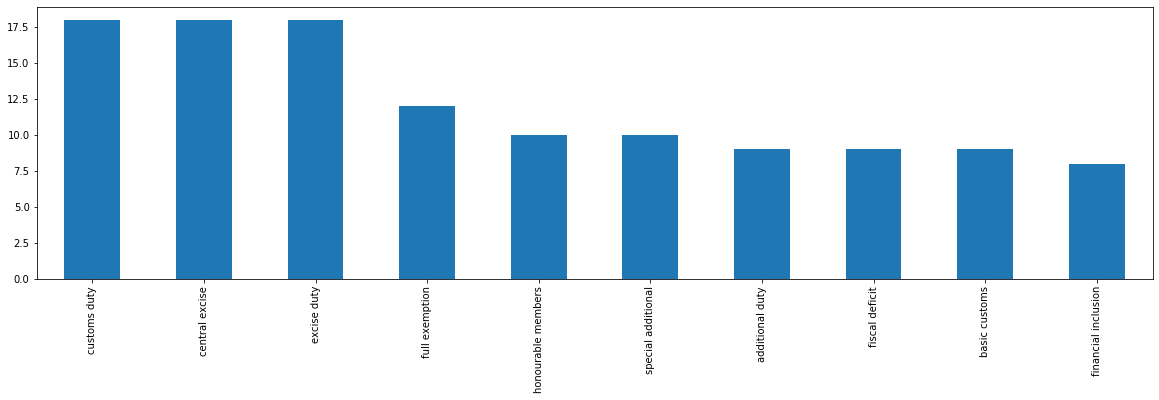

In [49]:
DTM_bigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(20,5))  

In [50]:
######## CREATE TRIGRAMS

from sklearn.feature_extraction.text import CountVectorizer
trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)


X_trigram = trigram_count_vectorizer.fit_transform(PM201002_txt_Tok_Stop_str_DF['Speech'])

# Creating a DTM
DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

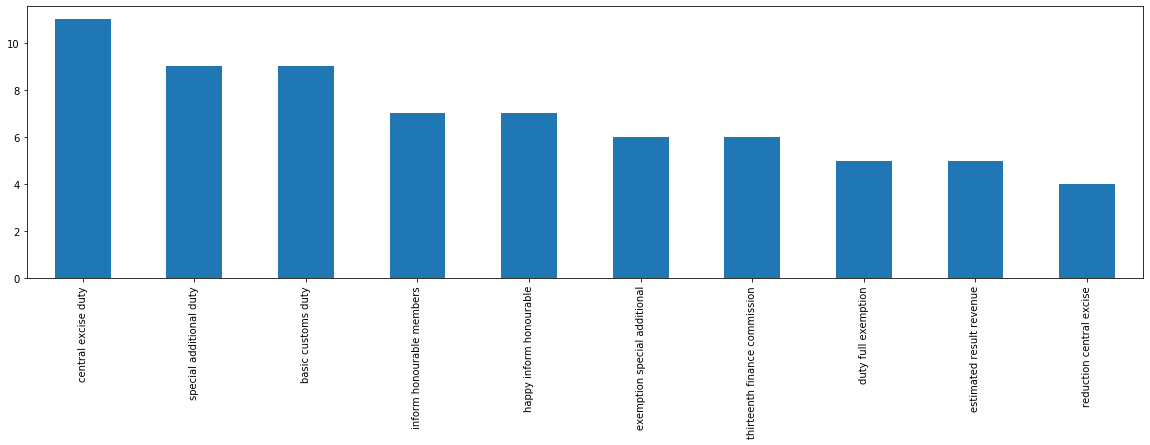

In [51]:
DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(20,5))  

In [47]:
####################Speech Sentiment flow for every line spoken.

In [52]:
SPLIT_FINAL_DF_SLI= SPLIT_FINAL_DF1.loc[:,['FM','sentiment_polarity','Speech_Cleaned_Num','Year','sentiment_polarity_tag']]
SPLIT_FINAL_DF_SLI['SRNO']=SPLIT_FINAL_DF_SLI.index
SPLIT_FINAL_DF_SLI = SPLIT_FINAL_DF_SLI.rename_axis('index1').reset_index()
SPLIT_FINAL_DF_SLI=SPLIT_FINAL_DF_SLI.drop(['index1'], axis = 1)  
SPLIT_FINAL_DF_SLI = SPLIT_FINAL_DF_SLI.rename_axis('SR').reset_index()
SPLIT_FINAL_DF_SLI_2010=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2010']
SPLIT_FINAL_DF_SLI_2011=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2011']
SPLIT_FINAL_DF_SLI_2012=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2012']
SPLIT_FINAL_DF_SLI_2013=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2013']
SPLIT_FINAL_DF_SLI_2014_INT=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2014-INT']
SPLIT_FINAL_DF_SLI_2014=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2014']
SPLIT_FINAL_DF_SLI_2015=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2015']
SPLIT_FINAL_DF_SLI_2016=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2016']
SPLIT_FINAL_DF_SLI_2017=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2017']
SPLIT_FINAL_DF_SLI_2018=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2018']
SPLIT_FINAL_DF_SLI_2019_INT=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2019-INT']
SPLIT_FINAL_DF_SLI_2019=SPLIT_FINAL_DF_SLI.loc[SPLIT_FINAL_DF_SLI['Year'] == '2019']


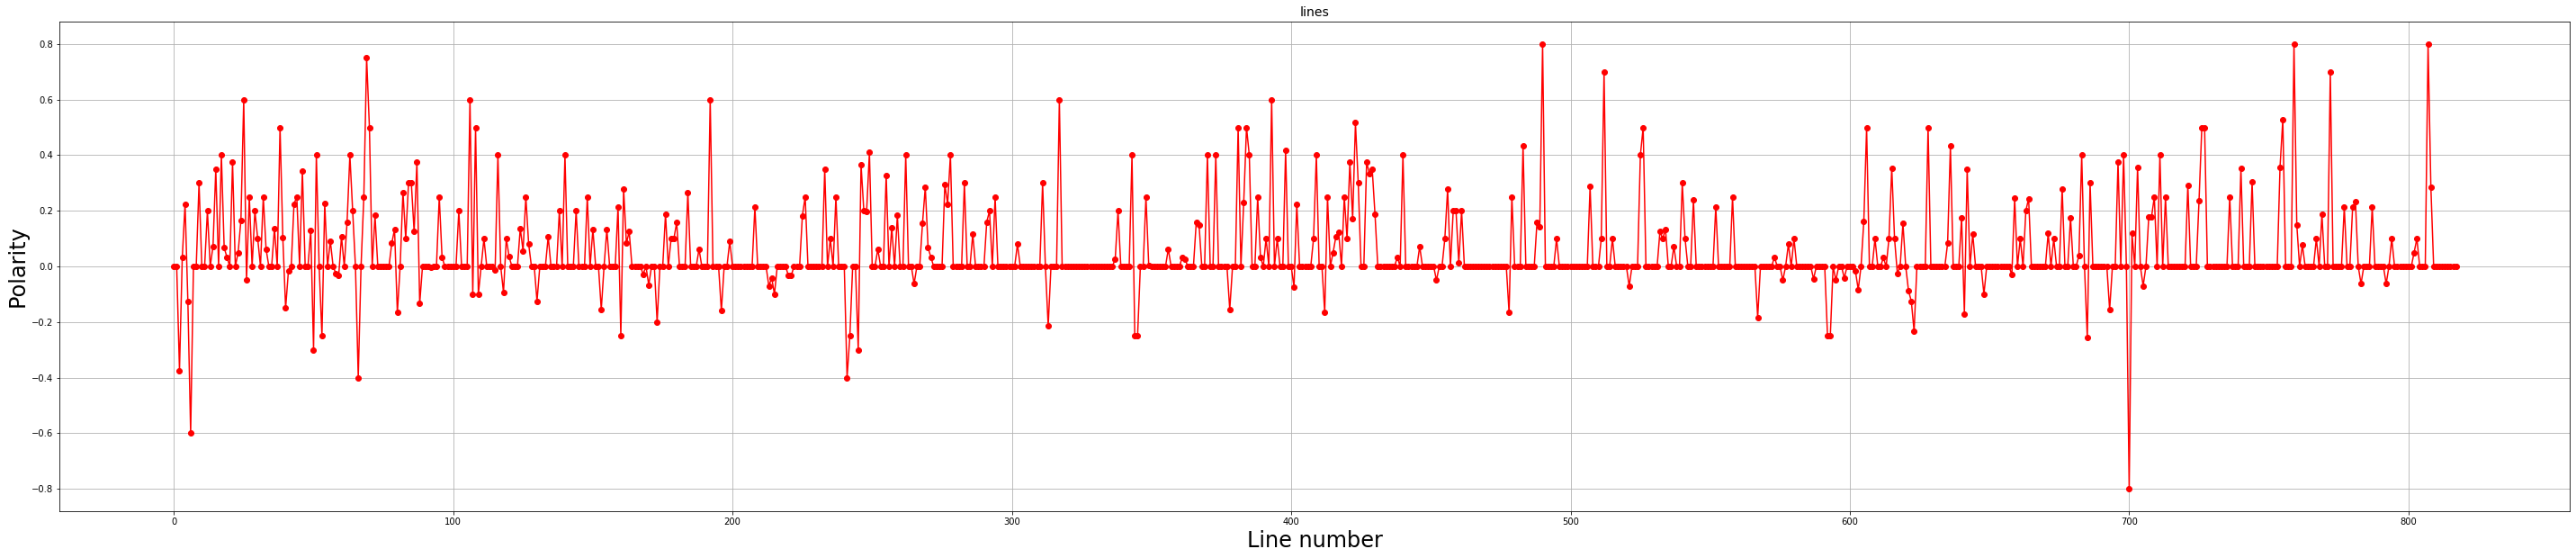

In [53]:
###### Sentiment flow in the speech  - Year 2010
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2010['SR'], SPLIT_FINAL_DF_SLI_2010['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

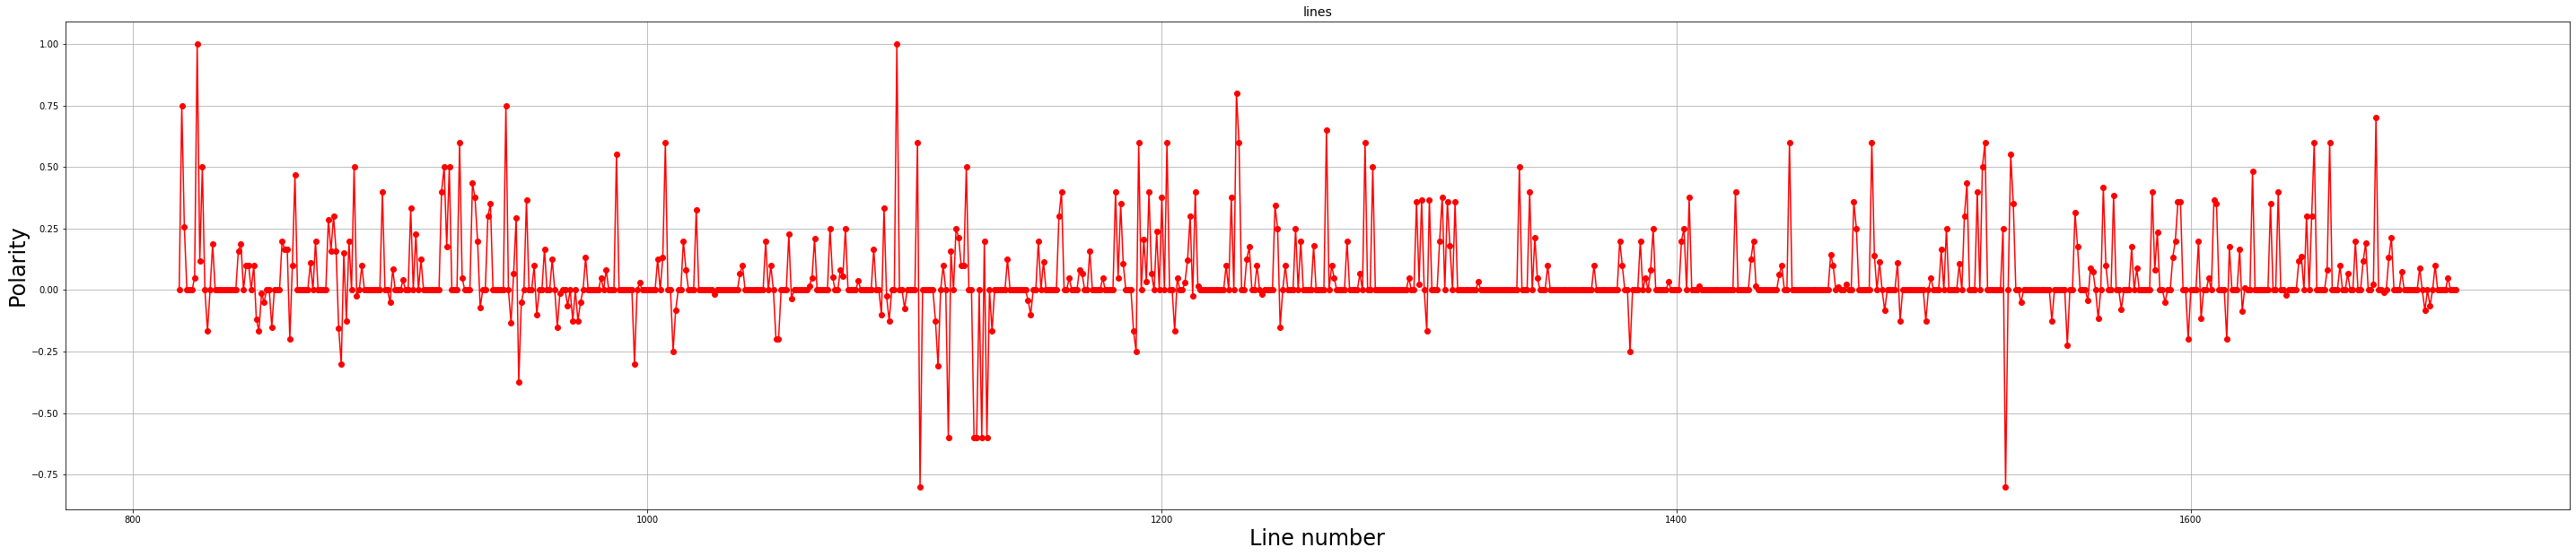

In [54]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2011['SR'], SPLIT_FINAL_DF_SLI_2011['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

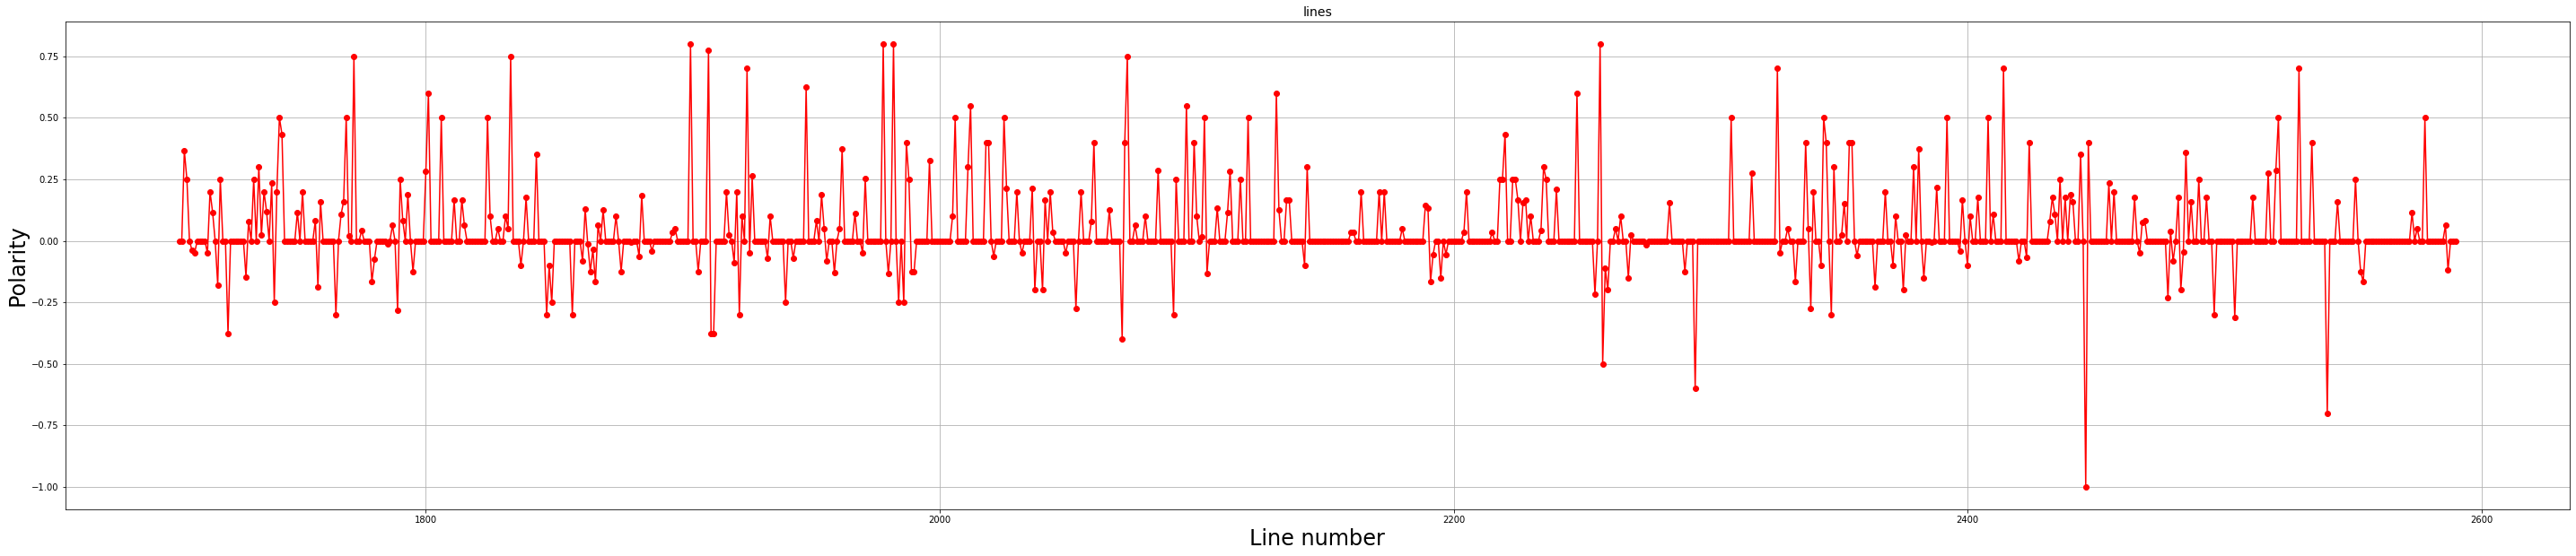

In [55]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2012['SR'], SPLIT_FINAL_DF_SLI_2012['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

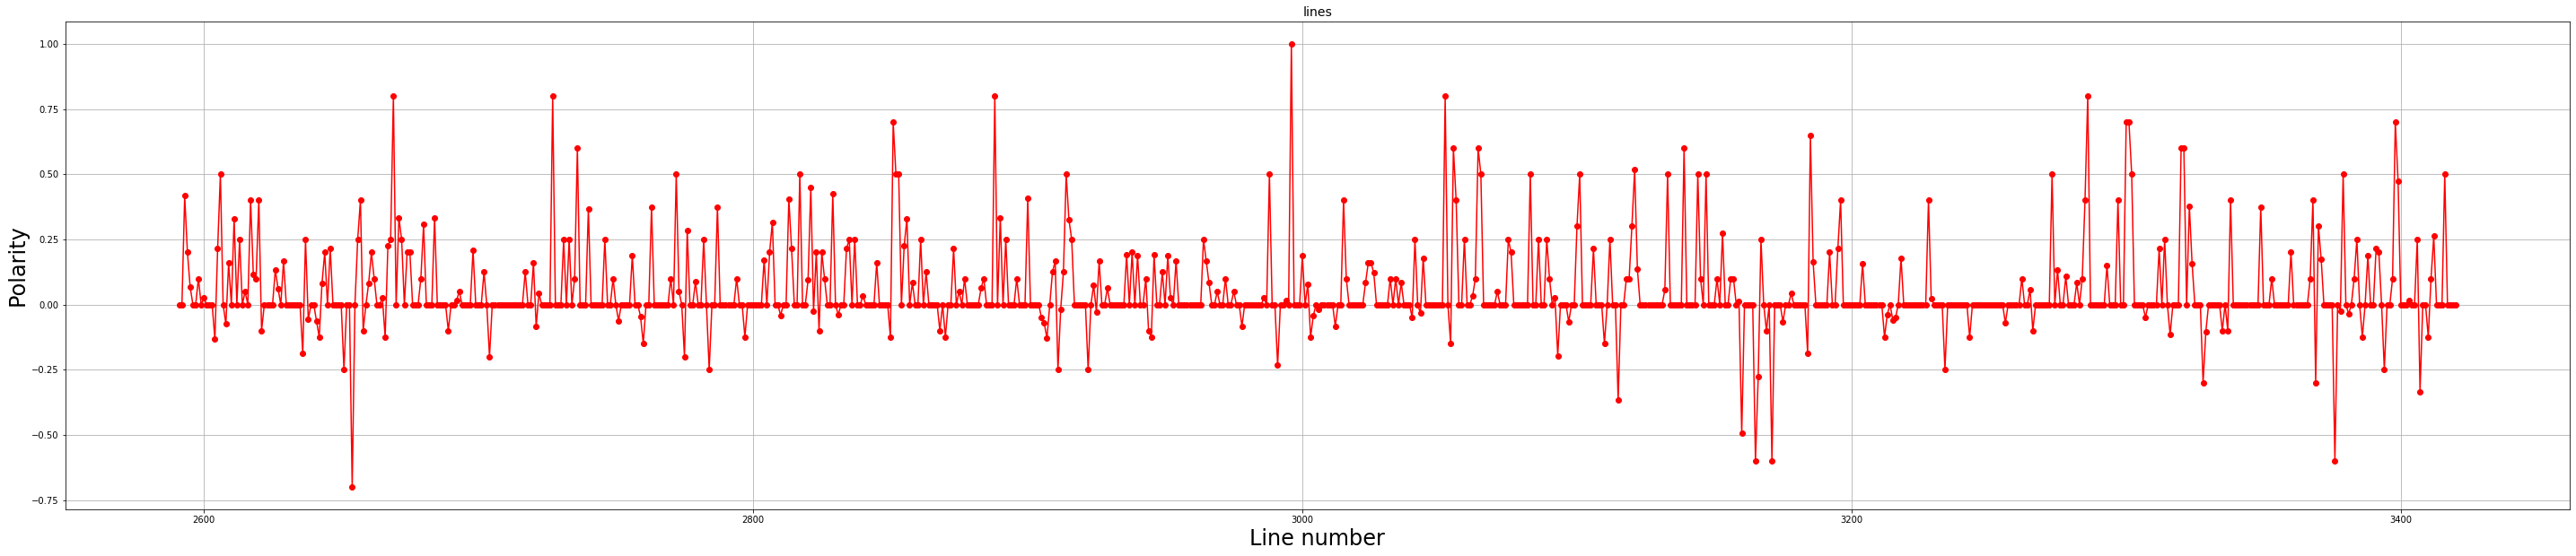

In [56]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2013['SR'], SPLIT_FINAL_DF_SLI_2013['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

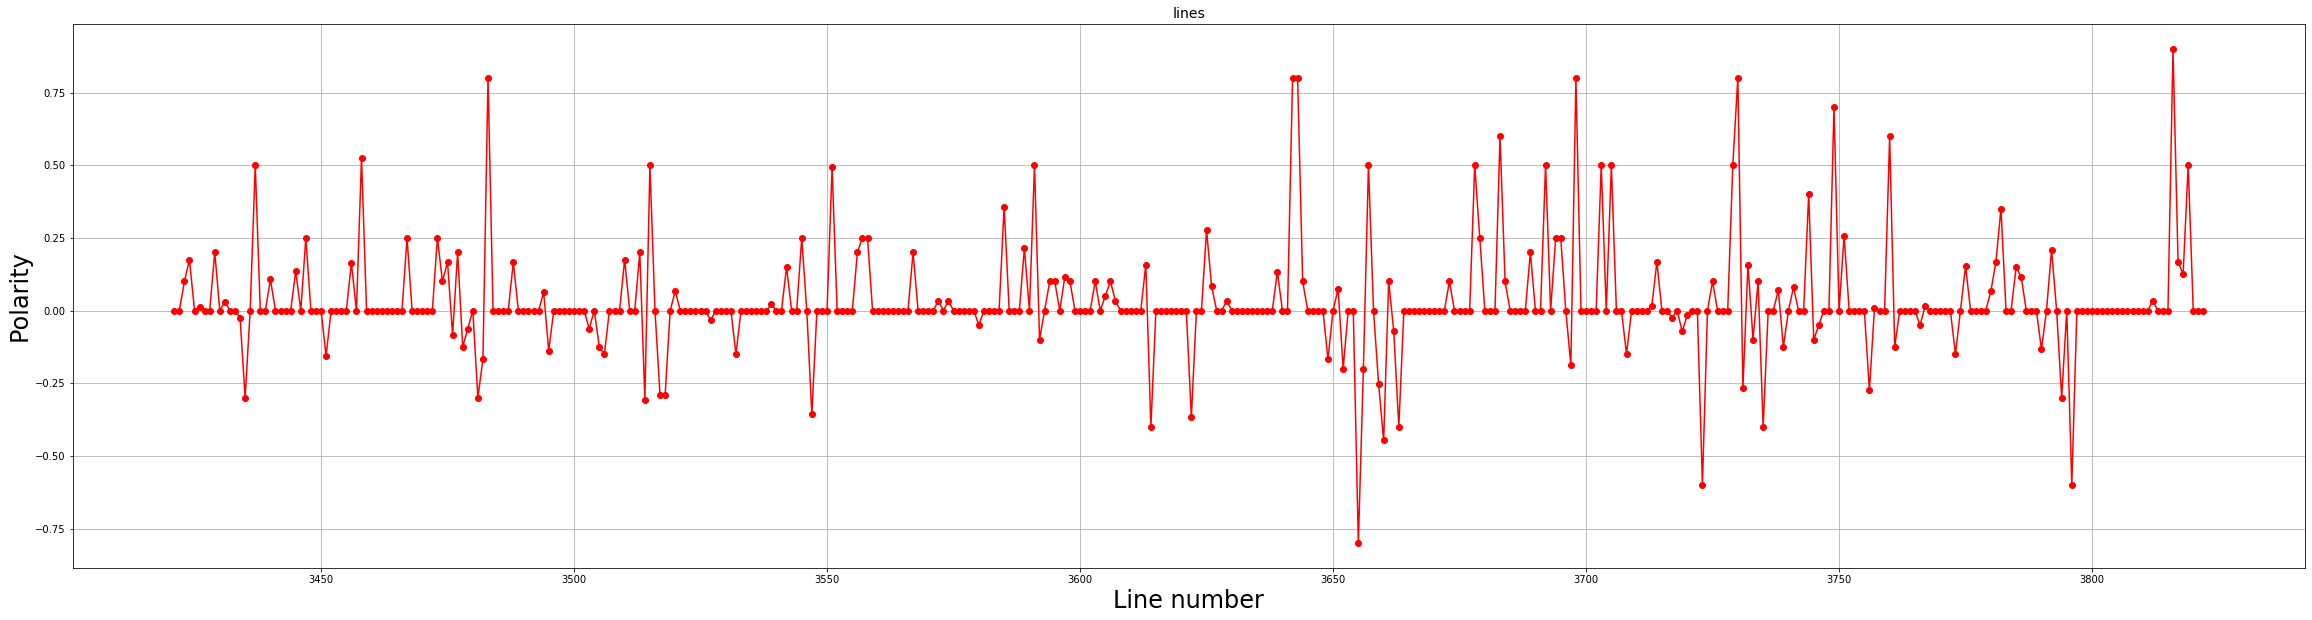

In [57]:
fig = plt.figure(figsize=(40, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2014_INT['SR'], SPLIT_FINAL_DF_SLI_2014_INT['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

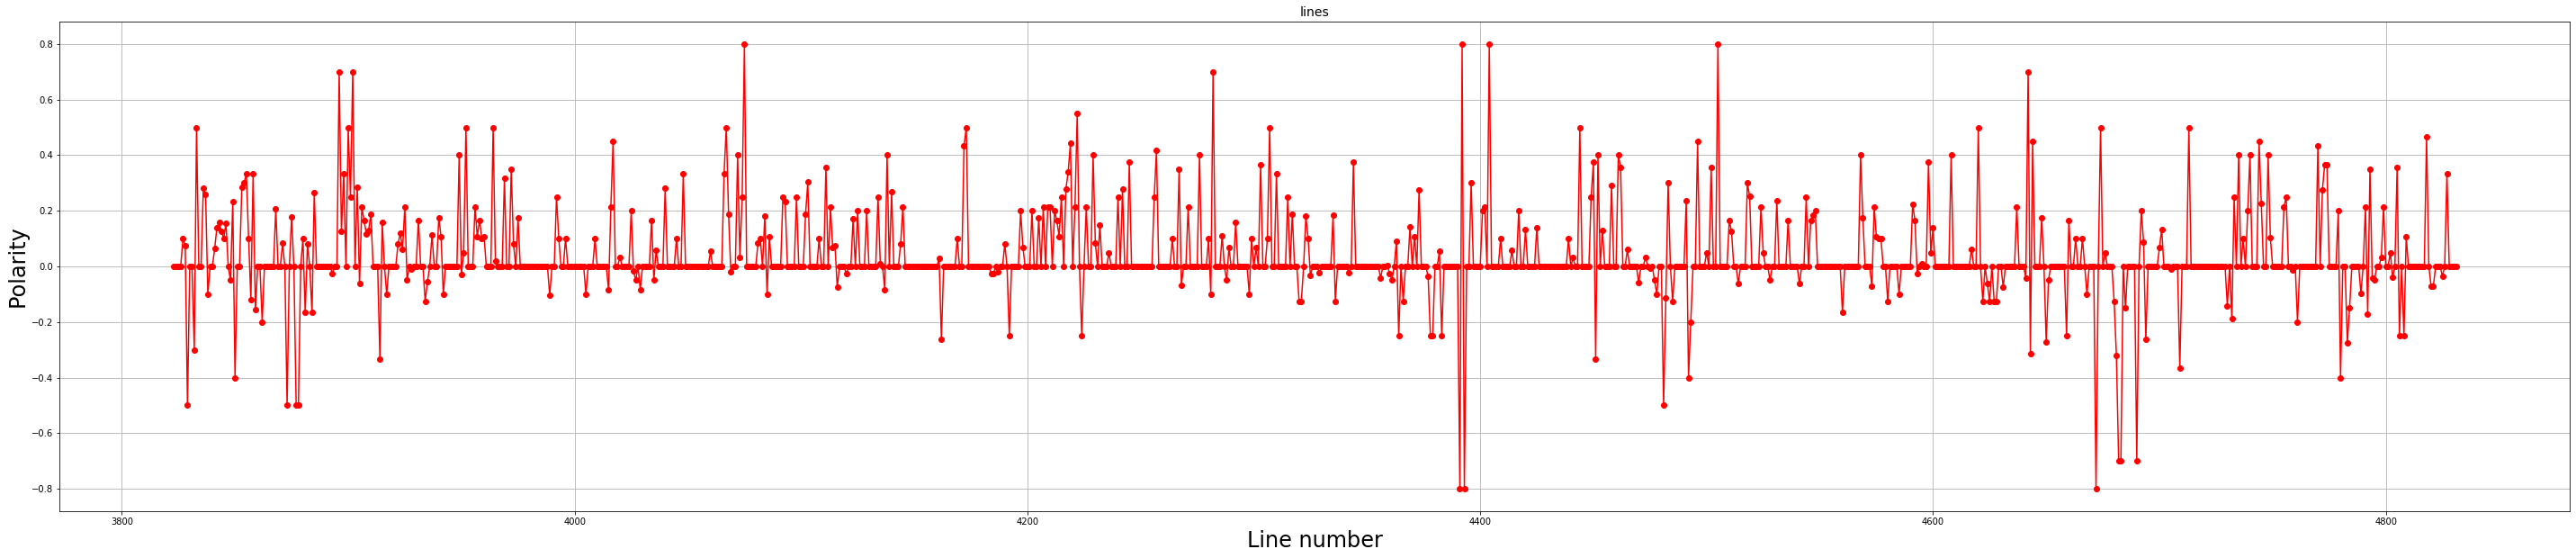

In [58]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2014['SR'], SPLIT_FINAL_DF_SLI_2014['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

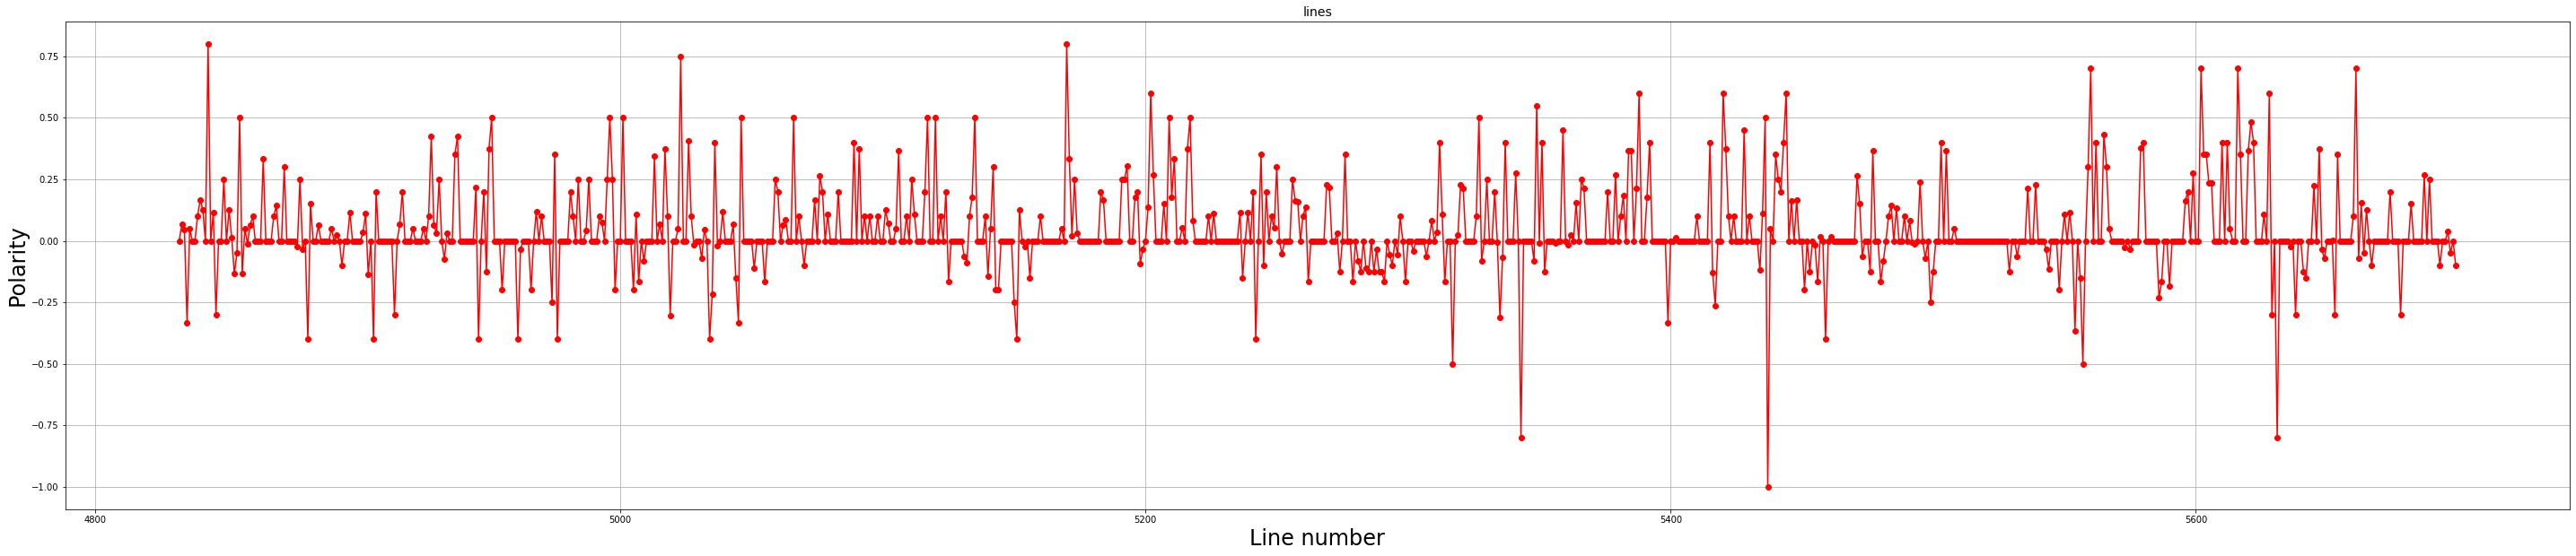

In [59]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2015['SR'], SPLIT_FINAL_DF_SLI_2015['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

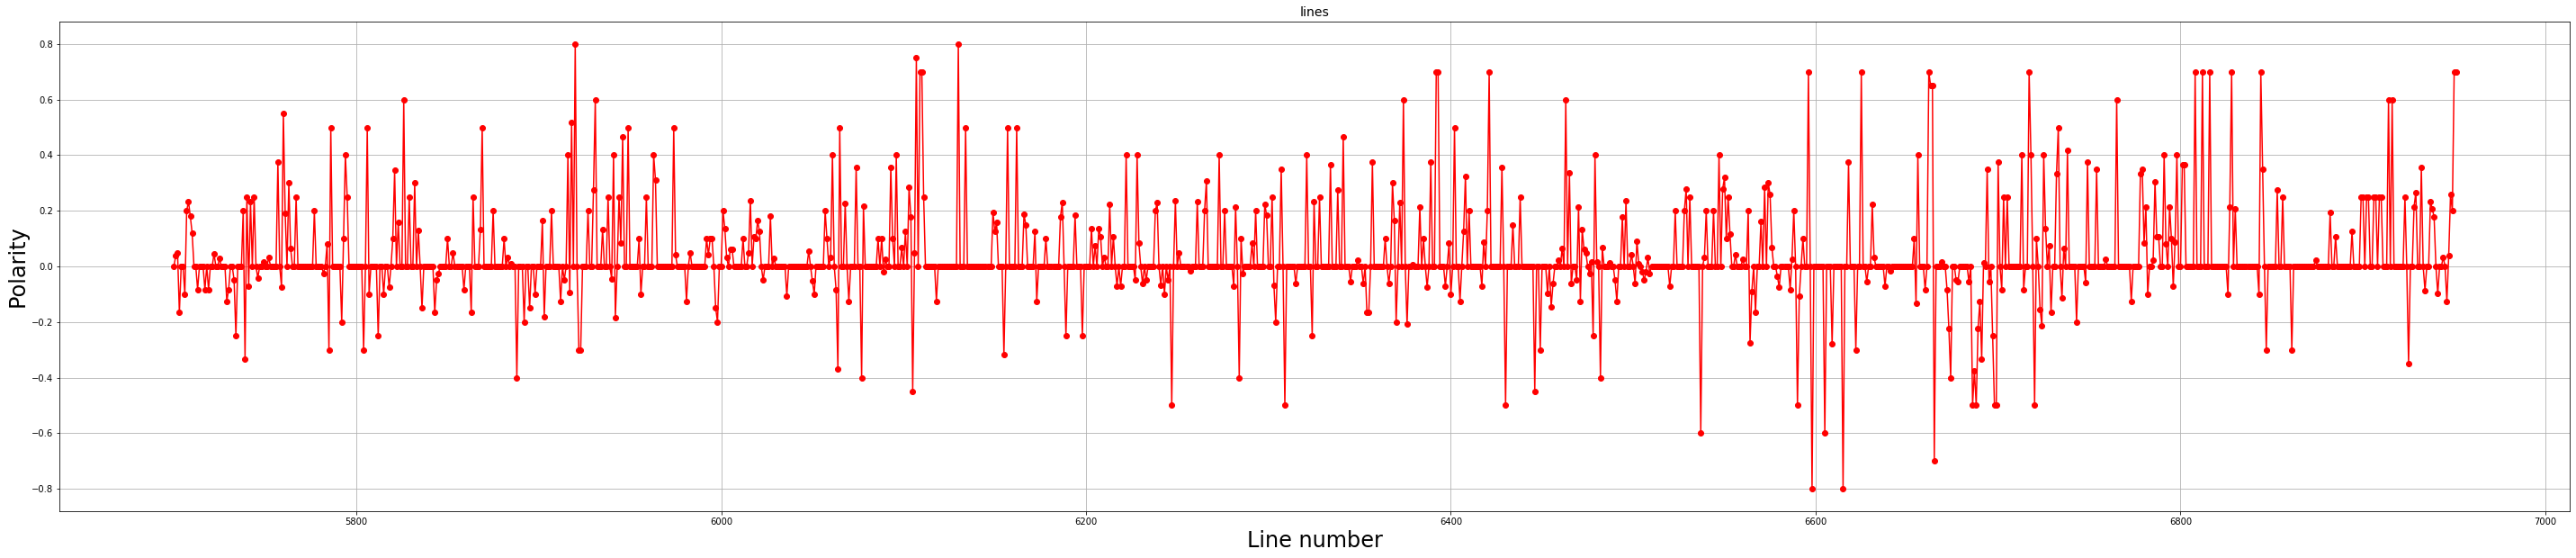

In [60]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2016['SR'], SPLIT_FINAL_DF_SLI_2016['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

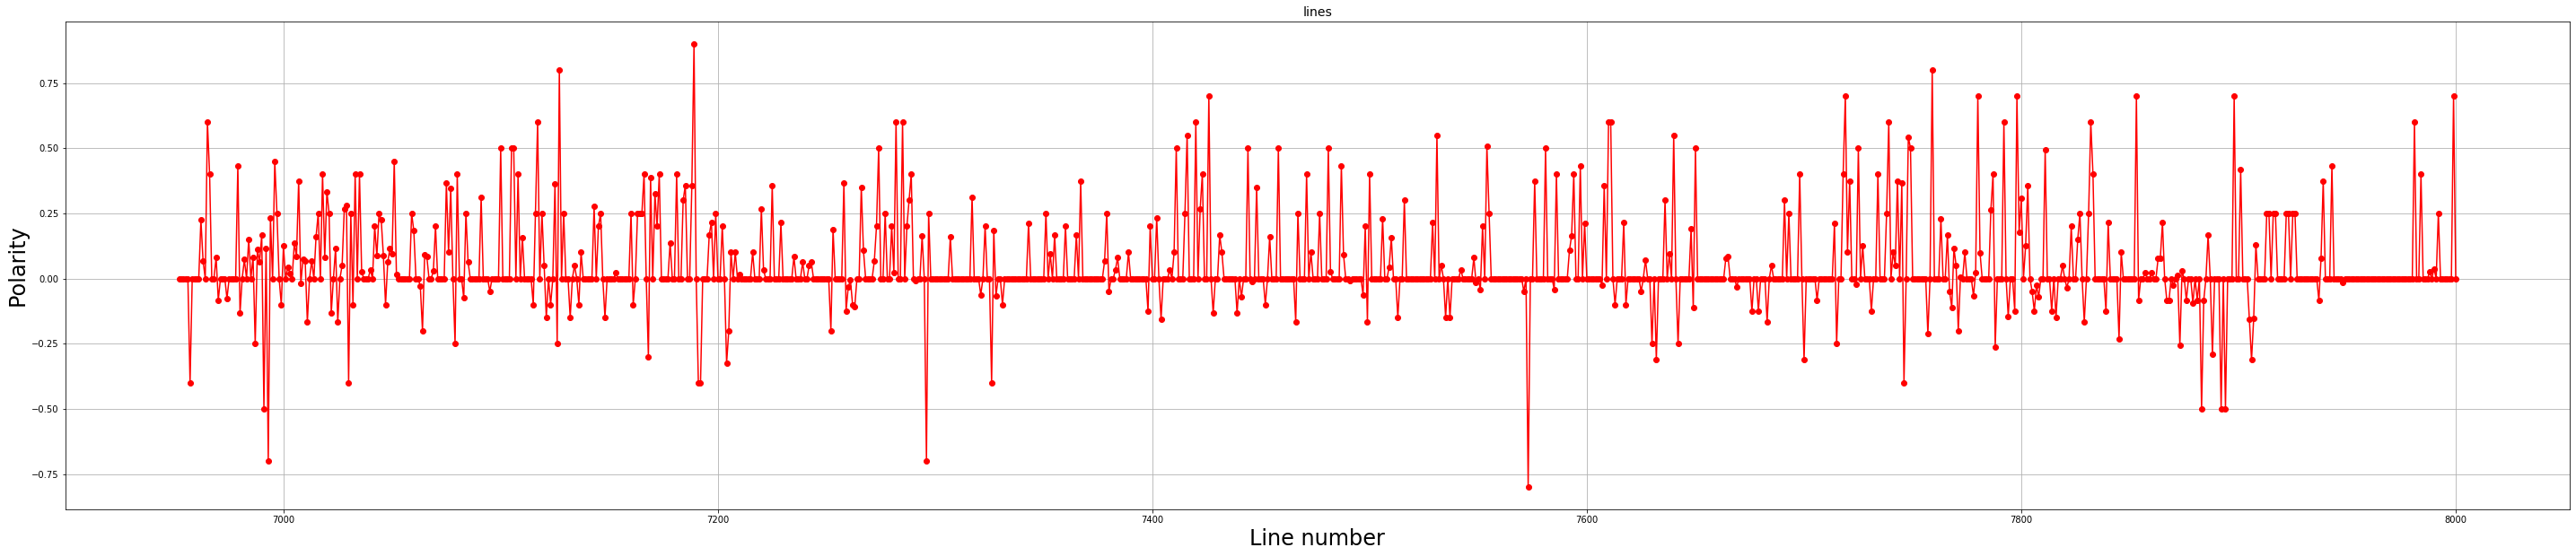

In [61]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2017['SR'], SPLIT_FINAL_DF_SLI_2017['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

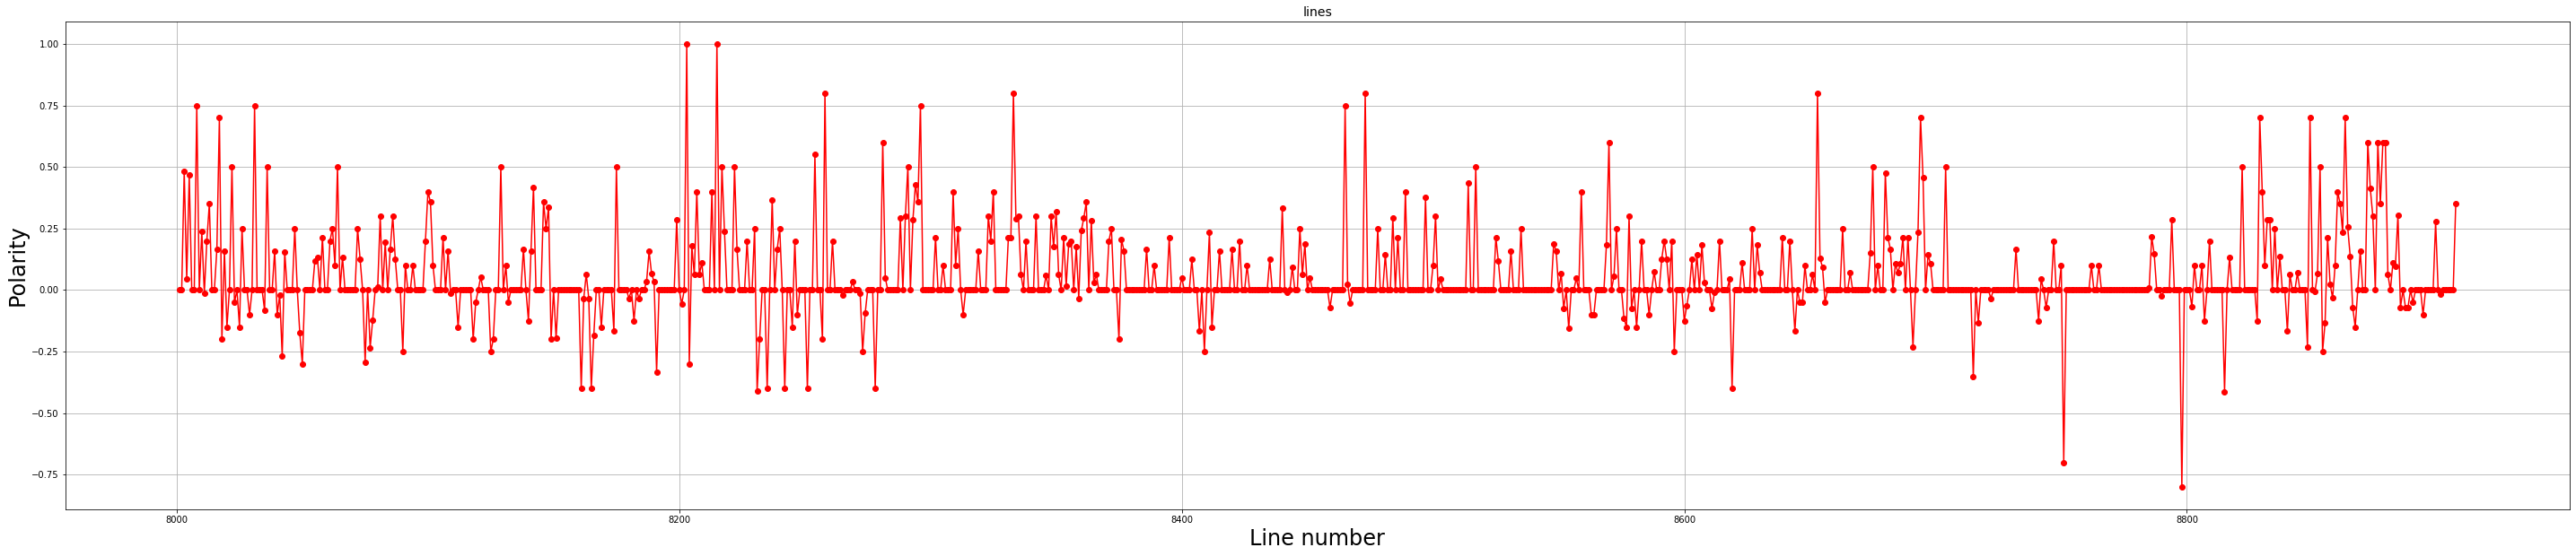

In [62]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2018['SR'], SPLIT_FINAL_DF_SLI_2018['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

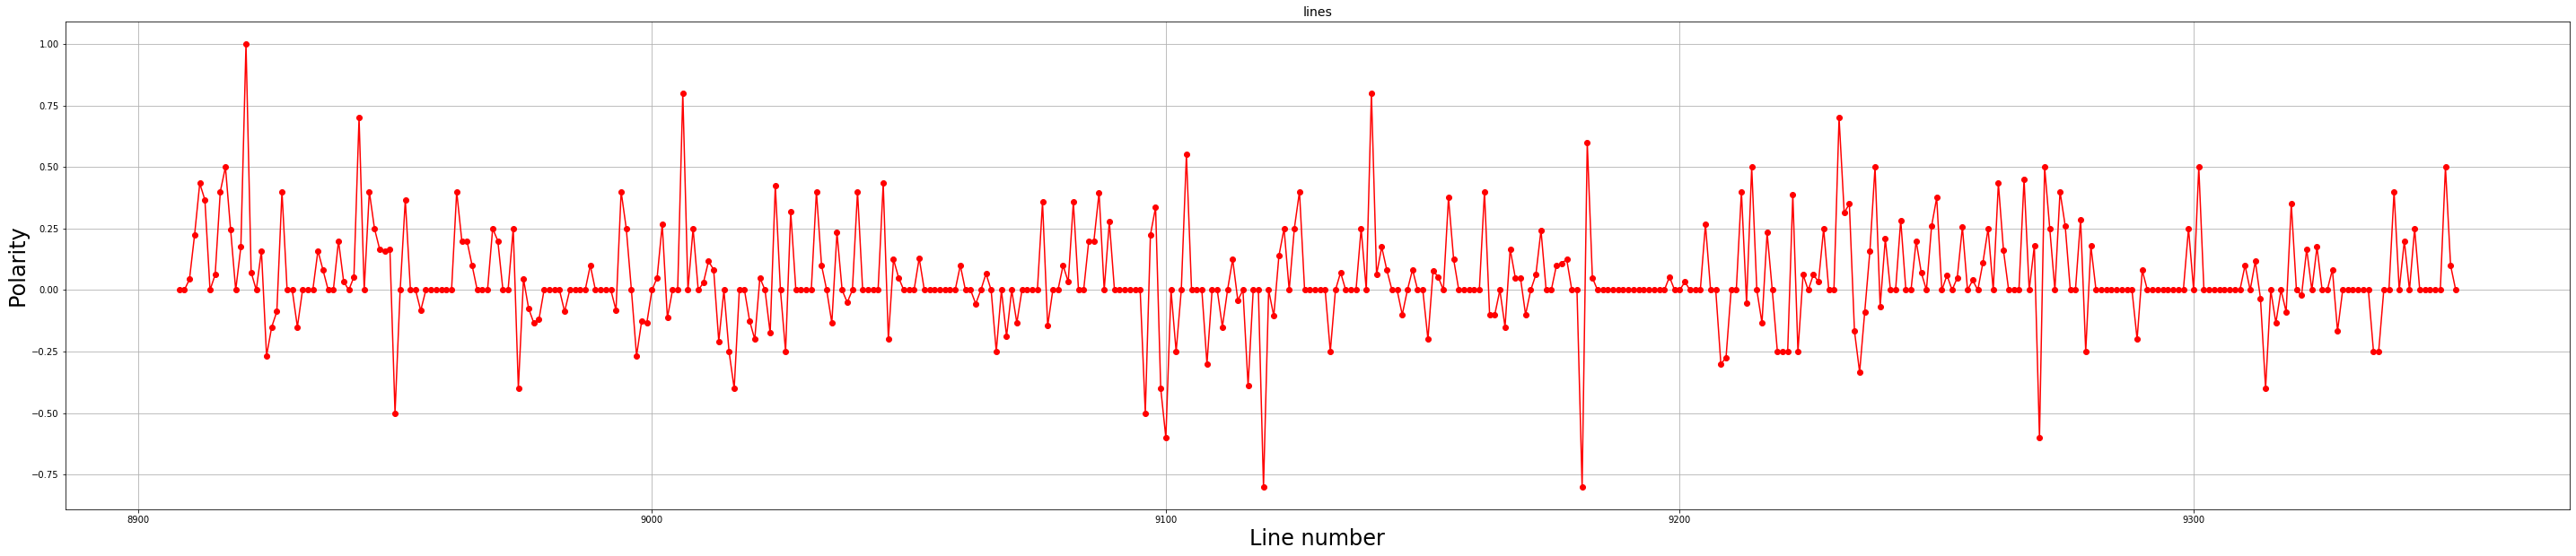

In [63]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2019_INT['SR'], SPLIT_FINAL_DF_SLI_2019_INT['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

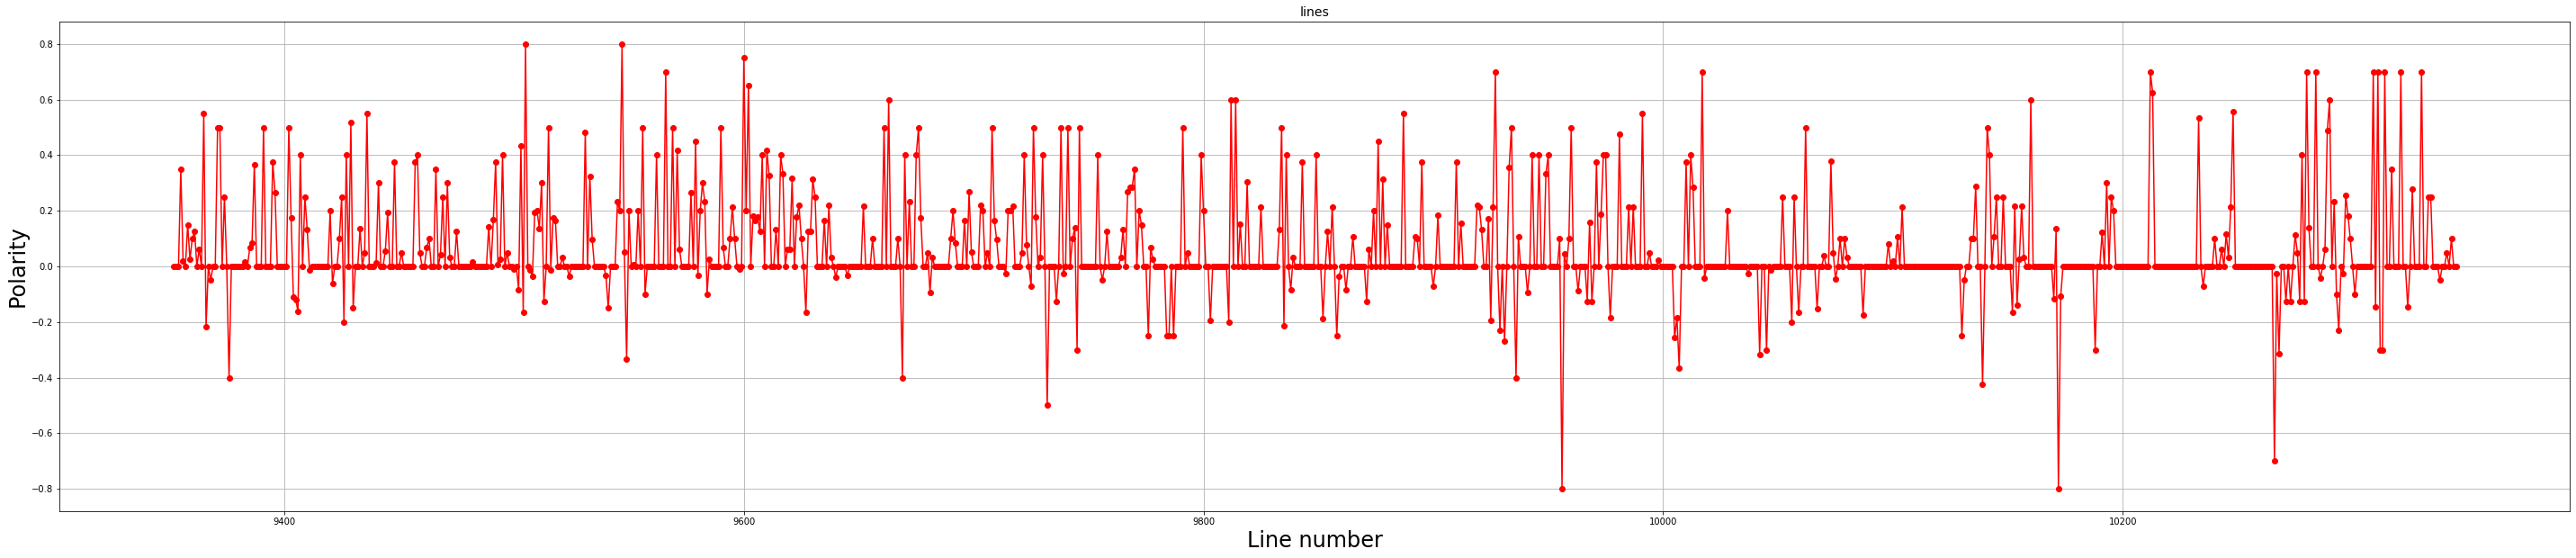

In [64]:
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
ax.plot(SPLIT_FINAL_DF_SLI_2019['SR'], SPLIT_FINAL_DF_SLI_2019['sentiment_polarity'], color='red', marker='o')
plt.title('lines', fontsize=14)
plt.xlabel('Line number', fontsize=24)
plt.ylabel('Polarity', fontsize=24)
plt.grid(True)
plt.show()

In [65]:
###################Sentiment Histogram

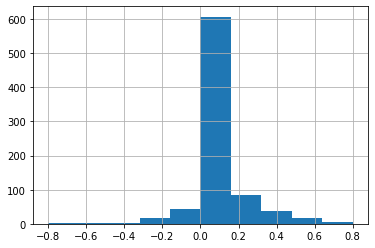

In [66]:
SPLIT_FINAL_DF_SLI_2010['sentiment_polarity'].hist()

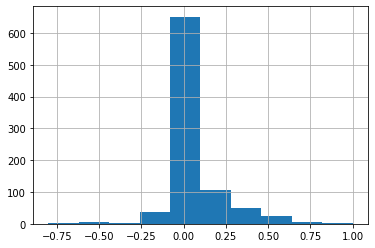

In [67]:
SPLIT_FINAL_DF_SLI_2011['sentiment_polarity'].hist()

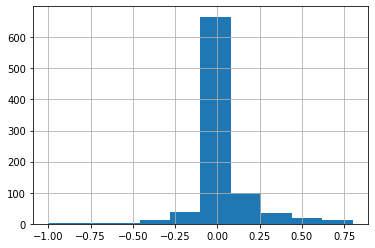

In [68]:
SPLIT_FINAL_DF_SLI_2012['sentiment_polarity'].hist()

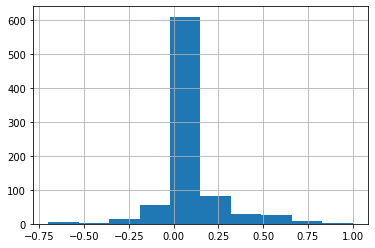

In [69]:
SPLIT_FINAL_DF_SLI_2013['sentiment_polarity'].hist()

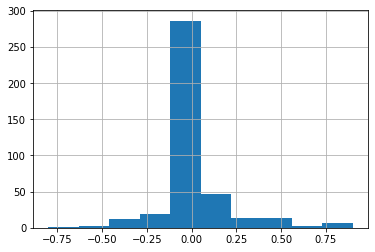

In [70]:
SPLIT_FINAL_DF_SLI_2014_INT['sentiment_polarity'].hist()

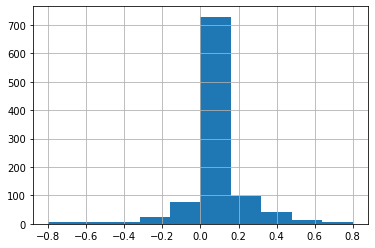

In [71]:
SPLIT_FINAL_DF_SLI_2014['sentiment_polarity'].hist()

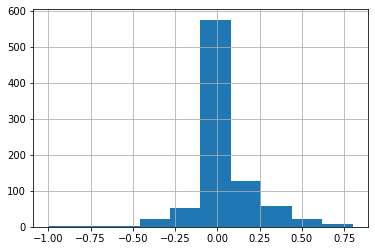

In [72]:
SPLIT_FINAL_DF_SLI_2015['sentiment_polarity'].hist()

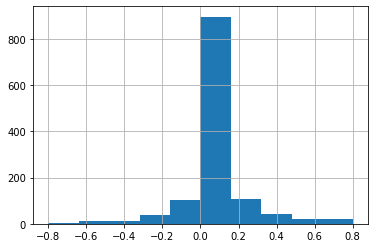

In [73]:
SPLIT_FINAL_DF_SLI_2016['sentiment_polarity'].hist()

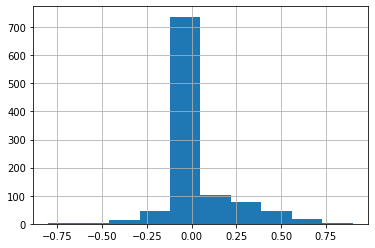

In [74]:
SPLIT_FINAL_DF_SLI_2017['sentiment_polarity'].hist()

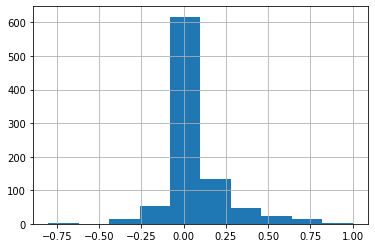

In [75]:
SPLIT_FINAL_DF_SLI_2018['sentiment_polarity'].hist()

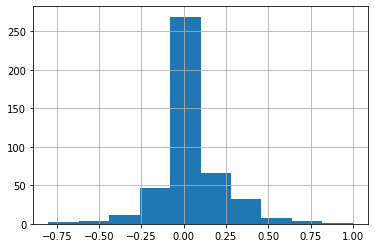

In [76]:
SPLIT_FINAL_DF_SLI_2019_INT['sentiment_polarity'].hist()

In [77]:
#############################SENTIMENT TAGGING for Speech/year

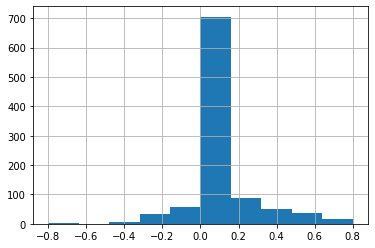

In [78]:
SPLIT_FINAL_DF_SLI_2019['sentiment_polarity'].hist()

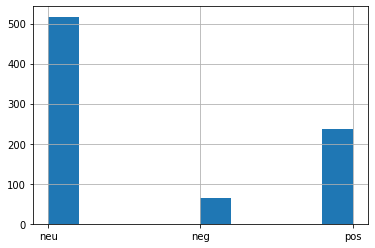

In [79]:
SPLIT_FINAL_DF_SLI_2010['sentiment_polarity_tag'].hist()

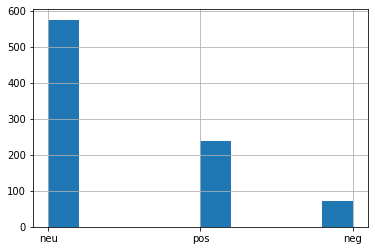

In [80]:
SPLIT_FINAL_DF_SLI_2011['sentiment_polarity_tag'].hist()

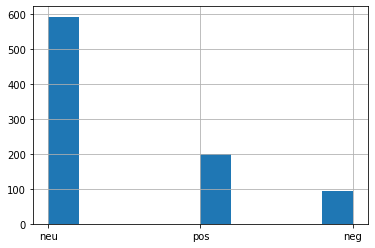

In [81]:
SPLIT_FINAL_DF_SLI_2012['sentiment_polarity_tag'].hist()

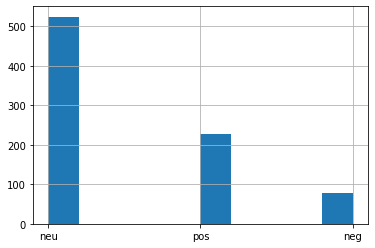

In [78]:
SPLIT_FINAL_DF_SLI_2013['sentiment_polarity_tag'].hist()

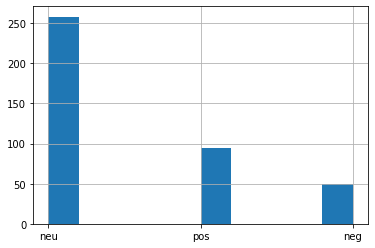

In [79]:
SPLIT_FINAL_DF_SLI_2014_INT['sentiment_polarity_tag'].hist()

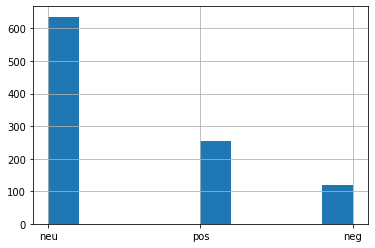

In [80]:
SPLIT_FINAL_DF_SLI_2014['sentiment_polarity_tag'].hist()

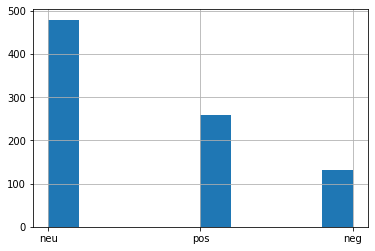

In [81]:
SPLIT_FINAL_DF_SLI_2015['sentiment_polarity_tag'].hist()

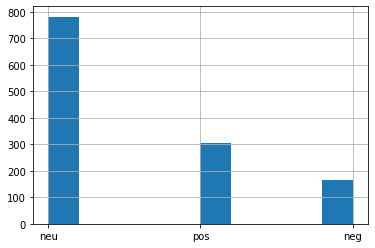

In [82]:
SPLIT_FINAL_DF_SLI_2016['sentiment_polarity_tag'].hist()

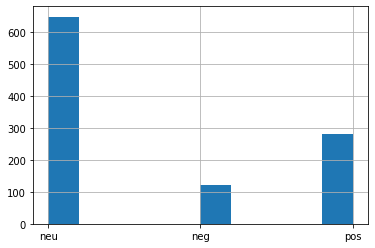

In [83]:
SPLIT_FINAL_DF_SLI_2017['sentiment_polarity_tag'].hist()

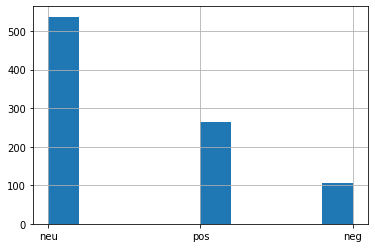

In [84]:
SPLIT_FINAL_DF_SLI_2018['sentiment_polarity_tag'].hist()

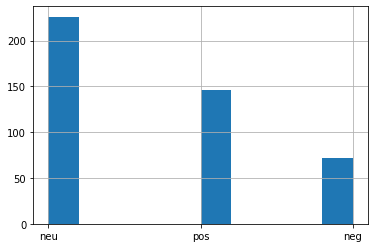

In [85]:
SPLIT_FINAL_DF_SLI_2019_INT['sentiment_polarity_tag'].hist()

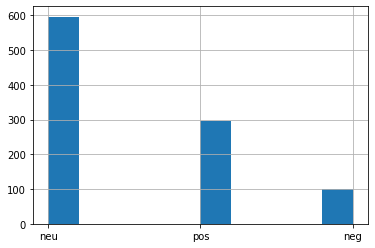

In [86]:
SPLIT_FINAL_DF_SLI_2019['sentiment_polarity_tag'].hist()

In [87]:
sector_dict ={"Agriculture" : ['agriculture','agricultural','agro','crop','soil','vegetable','food','farmers', 'rain','harvest','watershed management','dry land','green revolution','soil health','water conservation','biodiversity','climate','supply chain','food corporation of india','agriculture credit','debt wavier','debt relief','crop loan','cold storage','fertiliser','food process','food economy','fruit', 'vegetables','milk','meat','poultry','fish','oil palm','nutricereals', 'traditional farm', 'organic farm','green manure','weed management','pestcontrol', 'nabard','hunger','malnutrition','nfsb','agricultural labour','warehouse', 'irrigation','kisan credit card','aibp','fpo','fpc','sugarcane','cotton','pulse', 'kissan vikas patra','agri-technology','agri-business','horticulture','protein revolution','food security','kisan tv','organic food','soil fertility','mudra','irrigation fund','gram panchayat','agri market','operation green','ltig', 'mig','faidf','ahidf'], 
               "Industry" : ['construction','manufacture','healthcare','automobile','manufacture','gems','jewellery','petroleum','pharmaceutical','textile','paper','infotainment','environment','inland navigation','sport','youth','digital economy'],
              "Services":['information technology','bank','aviation','insurance','retail','tourism'],
              "Engineering": ['automobile','automotive','engineer'],
              "Infrastructure": ['transport','railways','port','road network','telecommunication','mine','electricity','energy','airports','national highways','industrial corridor','iifcl','power','electricity','coal','solar','hydro', 'pollution management','wind energy','thermal','fossil fuel','ridf','special vehicles', 'public private partnerships','ppp','vgf','natural gas','atomic energy','brgf','niif','irfc','nhb','health facilities'],
               "Foreign Trade": ['foreign trade','foreign direct investment','capital flow','fdi','foreign investors','downstream investment','financial market', 'financial stabiity','financial conglomerate','financial literacy','financial conclusion','foreign institutional investors','sebi','equity market','corporate bond','infrastructure bond','capital market','government securities','mutual fund','stock exchange','portfolio investors','angel investors','export','import','commodity derivatives market','investment fund','commodities market','masala bond'],
               "Education": ['education','shiksha','primary school','elementary education','train','education loan','iits','iim','cbse','aicte'],
               "Development": ['rural development','urban development','skill development','nsdc','secondary education','university education','welders', 'carpenter','cobblers','masons','blacksmiths','weavers','women and child development','gender mainstreaming','traditional skills','sankalp']}

In [88]:
def sector_mapping(text):
    sectors = []
    for sector in sector_dict:
        keywords = sector_dict[sector]
        flag = 0
        for word in keywords:
            if re.search(r'\b' + word + r'\b', text):
                flag = 1
            else:
                continue
            if flag == 1:
                  sectors.append(sector) 
            else:
                continue
    return list(set(sectors))

In [89]:
SPLIT_FINAL_DF_SLI['Sector'] = SPLIT_FINAL_DF_SLI.Speech_Cleaned_Num.apply(lambda x : sector_mapping(x))
SPLIT_FINAL_DF_SLI['Sector_List'] = SPLIT_FINAL_DF_SLI.Sector.apply(lambda x: ', '.join([str(i) for i in x]))
print(SPLIT_FINAL_DF_SLI.groupby(['Year','FM','Sector_List']).size())

Year      FM                Sector_List               
2010      Pranab Mukherjee                                638
                            Agriculture                    44
                            Agriculture, Education          1
                            Agriculture, Foreign Trade      2
                            Agriculture, Industry           1
                                                         ... 
2019-INT  Piyush Goyal      Industry                        9
                            Industry, Foreign Trade         1
                            Industry, Infrastructure        1
                            Infrastructure                 11
                            Services                       11
Length: 247, dtype: int64


In [90]:
DF_SECTOR=(SPLIT_FINAL_DF_SLI.groupby(['Year','FM','Sector_List']).size())

In [91]:
DF_SECTOR

Year      FM                Sector_List               
2010      Pranab Mukherjee                                638
                            Agriculture                    44
                            Agriculture, Education          1
                            Agriculture, Foreign Trade      2
                            Agriculture, Industry           1
                                                         ... 
2019-INT  Piyush Goyal      Industry                        9
                            Industry, Foreign Trade         1
                            Industry, Infrastructure        1
                            Infrastructure                 11
                            Services                       11
Length: 247, dtype: int64

In [92]:
DF_SECTOR.to_csv(r'C:\Users\DP186035\Desktop\part 1 - Python basics\FM_SECTOR_Data.csv')

In [93]:
SPLIT_FINAL_DF_SLI.to_csv(r'C:\Users\DP186035\Desktop\part 1 - Python basics\Final_Data.csv')

In [94]:
#Multinomial Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
cv = CountVectorizer()

In [95]:
X = cv.fit_transform(SPLIT_FINAL_DF1.Speech_Cleaned)
y = SPLIT_FINAL_DF1.sentiment_polarity_tag

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,
                                                 random_state=30)

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [98]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [99]:
y_test_pred = nb.predict(X_test)

In [100]:
accuracy_score(y_test, y_test_pred)

0.8386473429951691

In [101]:
confusion_matrix(y_test, y_test_pred)

array([[ 63,  17,  30],
       [ 15, 570,  54],
       [ 14,  37, 235]], dtype=int64)